<a href="https://colab.research.google.com/github/vivekgupta4Git/MedicinePackageDetector/blob/main/ZyephrAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
print(tf.__version__)

2.18.0


In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

In [ ]:
mc = os.listdir('/content/drive/MyDrive/medicine_dataset/train/medicine-class')
print(len(mc))
nmc = os.listdir('/content/drive/MyDrive/medicine_dataset/train/non-medicine-class')
print(len(nmc))
vmc = os.listdir('/content/drive/MyDrive/medicine_dataset/valid/medicine-class')
print(len(vmc))
vnmc = os.listdir('/content/drive/MyDrive/medicine_dataset/valid/non-medicine-class')
print(len(vnmc))
print('done')

3135
3124
645
645
done


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import plotly.express as px

class_names = ["medicine-class","non-medicine-class"]
number_of_medicines = len(mc)
number_of_non_medicines = len(nmc)
no_of_images = [number_of_medicines,number_of_non_medicines]
px.pie(names = class_names,values=no_of_images)

In [ ]:
number_of_medicines = len(vmc)
number_of_non_medicines = len(vnmc)
no_of_images = [number_of_medicines,number_of_non_medicines]
px.pie(names = class_names,values=no_of_images)

In [ ]:
train_dataset_dir = '/content/drive/MyDrive/medicine_dataset/train'
valid_dataset_dir = '/content/drive/MyDrive/medicine_dataset/valid'


training_datagen = ImageDataGenerator(rescale=1./255,
                                      #rotation_range=10,
                                      #width_shift_range=0.2,
                                      #height_shift_range=0.2,
                                      #shear_range=0.2,
                                      #zoom_range=0.2,
                                      #horizontal_flip=True,
                                      #fill_mode='nearest'
                                      )

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(train_dataset_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(valid_dataset_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='binary')



Found 6259 images belonging to 2 classes.
Found 1290 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'medicine-class': 0, 'non-medicine-class': 1}


Total Batches: 196


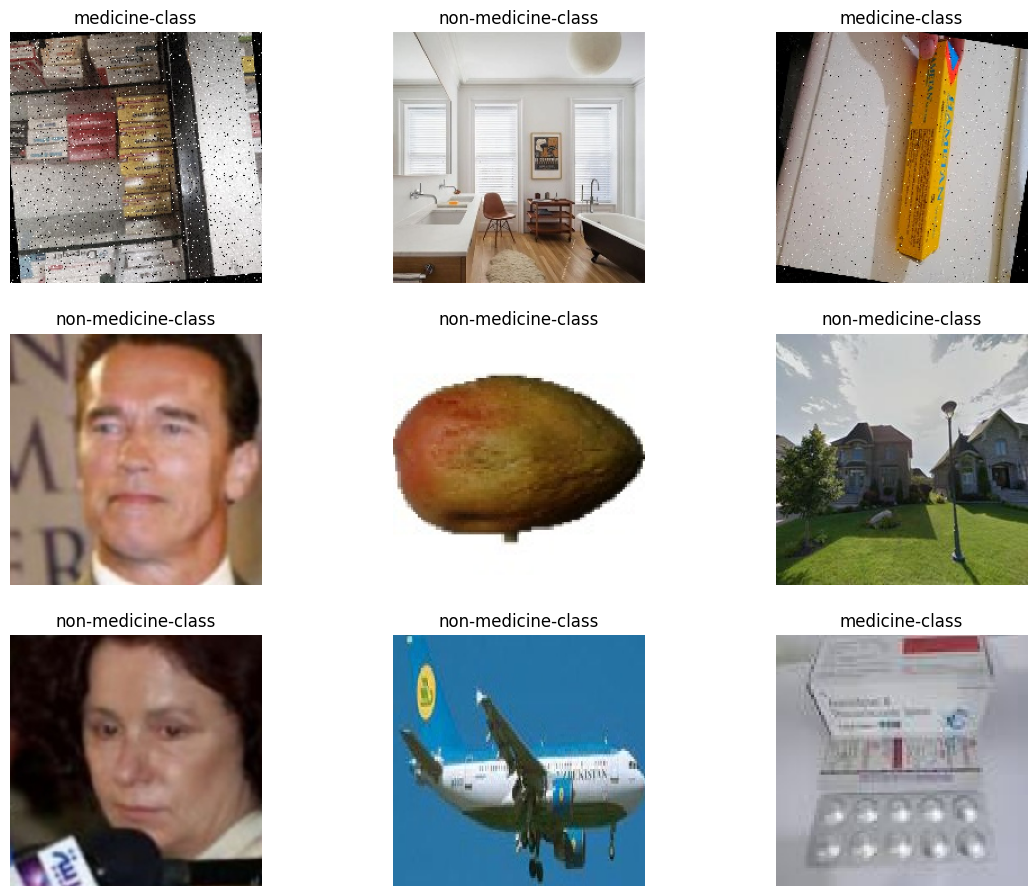

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plot_data(generator,n_images):
  """
  plots random data from dataset
  Args:
  generator :a generator instance
  n_images : number of images to plot
  """
  print(f"Total Batches: {len(generator)}")

  i = 1
  images, labels = next(generator)
  labels = labels.astype('int32')
  plt.figure(figsize=(14,15))

  for image,label in zip(images,labels):
    plt.subplot(4,3,i)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis('off')
    i += 1
    if i == n_images:
      break

  plt.show()

plot_data(train_generator,10)

Total Batches: 6


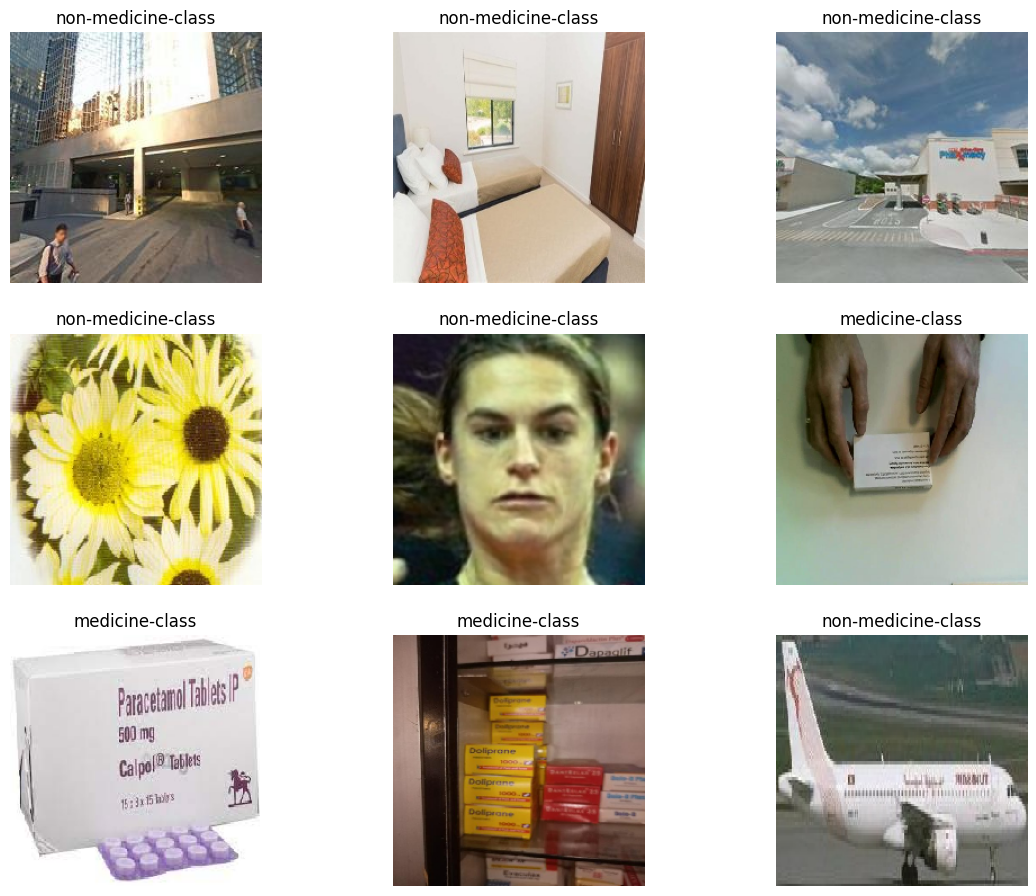

In [ ]:
plot_data(validation_generator,10)

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),
                               padding="same",kernel_regularizer = tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding="same",kernel_regularizer = tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid',
                              kernel_regularizer = tf.keras.regularizers.l2(0.001))
    ]
)
# Learning rate and optimizer
learning_rate = 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # Adam optimizer with learning rate

# Compile the model
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,457 (76.00 KB)

 Trainable params: 19,457 (76.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

print('Training...')
r = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping,lr_scheduler,tensorboard_callback]
)
print('Model Trained..')


Training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 1387s 7s/step - accuracy: 0.5612 - loss: 0.7107 - val_accuracy: 0.6698 - val_loss: 0.6490 - learning_rate: 5.0000e-04
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 618s 3s/step - accuracy: 0.6944 - loss: 0.6253 - val_accuracy: 0.7860 - val_loss: 0.5670 - learning_rate: 5.0000e-04
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.7690 - loss: 0.5436 - val_accuracy: 0.8054 - val_loss: 0.5247 - learning_rate: 5.0000e-04
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 577s 3s/step - accuracy: 0.7966 - loss: 0.5098 - val_accuracy: 0.8039 - val_loss: 0.5102 - learning_rate: 5.0000e-04
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.8179 - loss: 0.4814 - val_accuracy: 0.8163 - val_loss: 0.4861 - learning_rate: 5.0000e-04
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 594s 3s/step - accuracy: 0.8208 - loss: 0.4694 - val_accuracy: 0.8240 - val_loss: 0.4774 - learning_rate: 5.0000e-04
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 589s 3s/step - ac

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
model.save_weights('/content/drive/MyDrive/zyephr_ai..weights.h5')

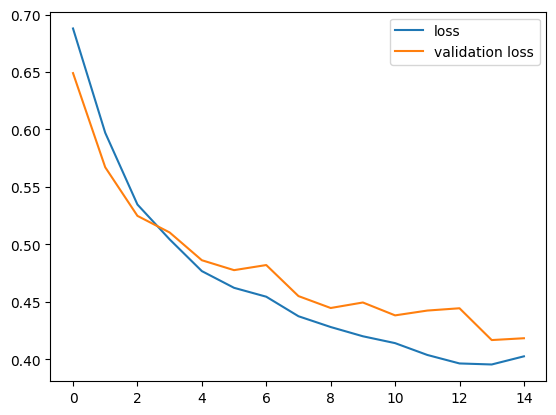

In [ ]:

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()

In [ ]:
test_generator = validation_datagen.flow_from_directory(valid_dataset_dir,
                                                              target_size=(224, 224),
                                                              batch_size=128,
                                                              class_mode='binary')


model.evaluate(test_generator)

Found 1290 images belonging to 2 classes.
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8284 - loss: 0.4322


[0.41656702756881714, 0.8426356315612793]

In [ ]:
import pandas as pd
results = pd.DataFrame(r.history)
results.tail()
fig = px.line(results,y=[results['accuracy'],results['val_accuracy']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(
    title_font_color="#fad25a",
    xaxis=dict(color="#fad25a",title='Epochs'),
    yaxis=dict(color="#fad25a")
 )
fig.show()

In [ ]:
fig2 = px.line(results,y=[results['loss'],results['val_loss']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig2.update_layout(
    title_font_color="#fad25a",
    xaxis=dict(color="#fad25a",title='Epochs'),
    yaxis=dict(color="#fad25a")
 )
fig2.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
[[0.25380296]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[0.7006979]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[0.9013934]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.9934223]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[0.8831148]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[0.82281065]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.74324447]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.00291403]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0.60400325]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.3725784]]


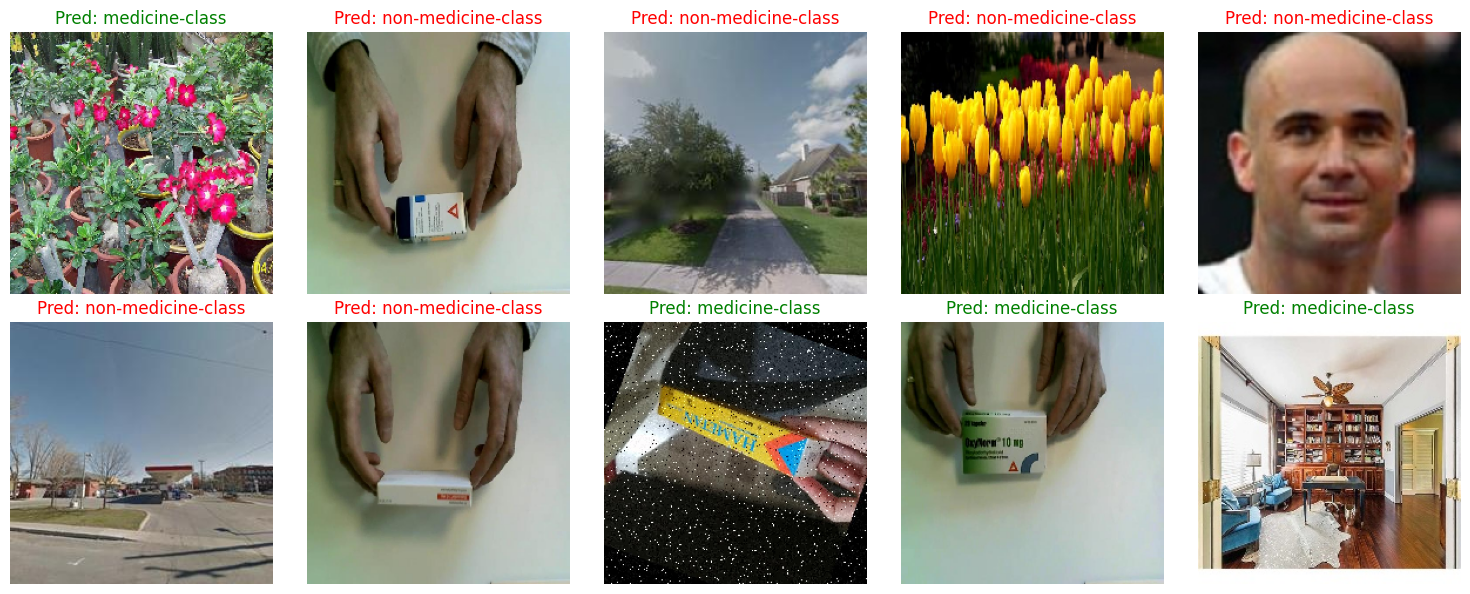

In [ ]:
import random
import numpy as np

def predict_random_images(test_directory, model_to_test, class_names_to_predict, num_images=10):
    """
    Selects 10 random images from the test directory, predicts them using the trained model, and displays them.

    Args:
    test_directory (str): Path to the test directory containing mixed images.
    model_to_test (tf.keras.Model): Trained classification model.
    class_names_to_predict (list): List of class labels (e.g., ['Non-Medicine', 'Medicine']).
    num_images (int): Number of random images to predict (default: 10).
    """

    # Get all image file names from the test directory
    all_images = [img for img in os.listdir(test_directory) if img.lower().endswith(('png', 'jpg', 'jpeg'))]

    # Randomly select `num_images` images
    selected_images = random.sample(all_images, min(num_images, len(all_images)))

    # Determine number of rows and columns dynamically
    cols = min(num_images, 5)  # Max 5 columns for a balanced look
    rows = int(np.ceil(num_images / cols))  # Compute the required rows

    plt.figure(figsize=(cols * 3, rows * 3))

    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(test_directory, img_name)

        # Load image, resize to (224,224), convert to array
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict class (probability score)
        prediction = model_to_test.predict(img_array)
        print(prediction)
        # Get predicted class label and confidence
        #confidence = prediction[0][0]  # Assuming binary classification (single neuron output)
        #print(f"Image: {img_name} → Predicted Probability: {confidence:.2f}")

        # Determine class label (1 = Non-Medicine, 0 = Medicine)
        #predicted_label = class_names_to_predict[int(confidence > 0.3)]  # Threshold 0.3

        # Display image with predicted label
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(f"Pred: {'medicine-class' if prediction < 0.7 else 'non-medicine-class'}", color='green' if prediction < 0.7 else 'red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Call function
test_dir ='/content/drive/MyDrive/medicine_dataset/test'
predict_random_images(test_dir, model, class_names,10)


In [ ]:
model.save('/content/drive/MyDrive/zyephr_ai.h5')


In [ ]:
model.save_weights('/content/drive/MyDrive/zyephr_ai..weights.h5')

In [ ]:

model = tf.keras.models.load_model('/content/drive/MyDrive/zyephr_ai.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,459 (76.02 KB)

 Trainable params: 19,457 (76.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model.load_weights('/content/drive/MyDrive/zyephr_ai..weights.h5')
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
r = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    initial_epoch=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 18 variables. 



Epoch 21/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9892 - loss: 0.0405 - val_accuracy: 0.9132 - val_loss: 0.2470
Epoch 22/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9880 - loss: 0.0361 - val_accuracy: 0.8775 - val_loss: 0.3063
Epoch 23/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9917 - loss: 0.0246 - val_accuracy: 0.9643 - val_loss: 0.0847
Epoch 24/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9939 - loss: 0.0204 - val_accuracy: 0.9736 - val_loss: 0.0563
Epoch 25/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.8736 - val_loss: 0.2498
Epoch 26/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9914 - loss: 0.0284 - val_accuracy: 0.9558 - val_loss: 0.1281
Epoch 27/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9926 - loss: 0.0237 - val_accuracy: 0.9318 - val_loss: 0.1798
Epoch 28/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9934 - loss: 0.0185 - val_accuracy: 0.9527 - v

In [ ]:
import pandas as pd
results = pd.DataFrame(r.history)
results.tail()
fig = px.line(results,y=[results['accuracy'],results['val_accuracy']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(
    title_font_color="#fad25a",
    xaxis=dict(color="#fad25a",title='Epochs'),
    yaxis=dict(color="#fad25a")
 )
fig.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
[[0.76208556]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.8457925]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.75805384]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.78939605]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.42256847]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.6310045]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.98039836]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0.87868434]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.5543181]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.7321966]]


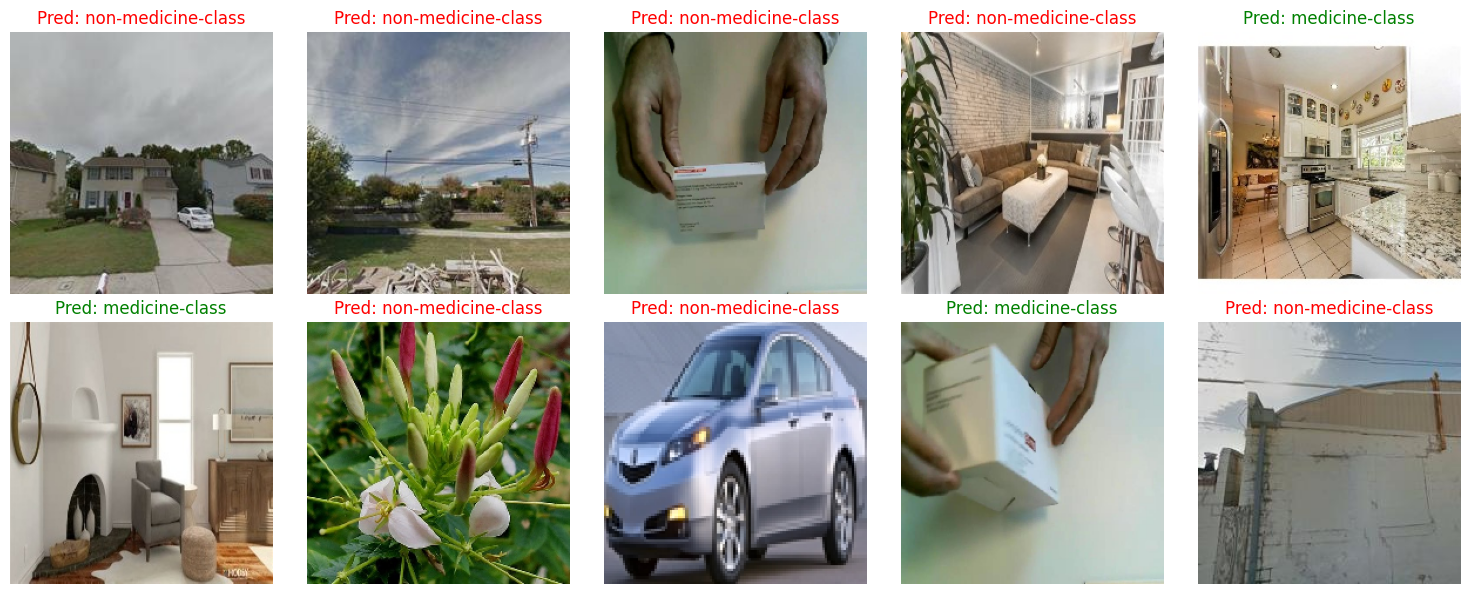

In [ ]:
predict_random_images(test_dir, model, class_names,10)

In [ ]:
fig2 = px.line(results,y=[results['loss'],results['val_loss']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig2.update_layout(
    title_font_color="#fad25a",
    xaxis=dict(color="#fad25a",title='Epochs'),
    yaxis=dict(color="#fad25a")
 )
fig2.show()

In [ ]:

def predict_image(img_path,threshold=0.3):
    try:
        img = image.load_img(img_path,target_size=(224,224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array,axis=0)
        img_array /= 255.0

        prediction = model.predict(img_array)
        print(prediction)
        predicted_class = 'non-medicine-class' if prediction > threshold else 'medicine-class'
        confidence = max(prediction[0][0], 1 - prediction[0][0])  # Confidence for the chosen class

        return predicted_class, confidence
    except Exception as e:
        print(f"Skipping {img_path} due to error: {e}")
        return None, None

#
test_image_with_path = '/content/drive/MyDrive/amoxicillin-capsules-holding-in-a-human-hand-close-up-of-antibiotic-capsules-pack-medicine-and-medical-concept-photo.jpg'
#'/content/drive/MyDrive/pencil.jpeg'
#'/content/drive/MyDrive/amoxicillin-capsules-holding-in-a-human-hand-close-up-of-antibiotic-capsules-pack-medicine-and-medical-concept-photo.jpg'
pred_class,conf = predict_image(test_image_with_path)

if pred_class is not None and conf is not None:
      print(f"Image: → Predicted Class: {pred_class} (Confidence: {conf:.2f})")
else:
        print(f"Image:  → Could not classify the image.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[0.1264857]]
Image: → Predicted Class: medicine-class (Confidence: 0.87)


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/zyephr_ai.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
tf.lite.experimental.Analyzer.analyze(model_content=tflite_model)
with open('/content/drive/MyDrive/zyephr_ai.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpu7l2lwo5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140344441814864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140344441811408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140344441813328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140344441810448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140344269341712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140344269343440: TensorSpec(shape=(), dtype=tf.resource, name=None)
=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the CONV_2D op takes
tensor #0 and tensor #2 and tensor #1 as input and produces tensor #8 as output.

Subgraph#0 main(T#0) -> [T#1